In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras.utils import np_utils

datasets preparing 

In [4]:
from keras.datasets import boston_housing
(X_train,y_train),(X_test, y_test) = boston_housing.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


#  Start Building Neural Network Model 

In [10]:
model = Sequential()
model.add(Dense(100, input_shape=(13,)))
model.add(Activation ('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(1))   # y=x bcs linear 
model.add(Activation('linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               1400      
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

# Model compilation 

In [13]:
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['mse'])

In [21]:
model.fit(X_train,y_train,
         batch_size=32,
         nb_epoch=20,
         verbose=2,
          validation_data=(X_test, y_test))

Train on 404 samples, validate on 102 samples
Epoch 1/20
 - 0s - loss: 10.5332 - mse: 10.5332 - val_loss: 25.1035 - val_mse: 25.1035
Epoch 2/20
 - 0s - loss: 9.5611 - mse: 9.5611 - val_loss: 27.0092 - val_mse: 27.0092
Epoch 3/20
 - 0s - loss: 9.1197 - mse: 9.1197 - val_loss: 28.0366 - val_mse: 28.0366
Epoch 4/20
 - 0s - loss: 10.1180 - mse: 10.1180 - val_loss: 27.7773 - val_mse: 27.7773
Epoch 5/20
 - 0s - loss: 11.4237 - mse: 11.4237 - val_loss: 29.2402 - val_mse: 29.2402
Epoch 6/20
 - 0s - loss: 11.2739 - mse: 11.2739 - val_loss: 26.1918 - val_mse: 26.1918


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 7/20
 - 0s - loss: 9.5396 - mse: 9.5396 - val_loss: 26.7816 - val_mse: 26.7816
Epoch 8/20
 - 0s - loss: 9.3580 - mse: 9.3580 - val_loss: 27.4054 - val_mse: 27.4054
Epoch 9/20
 - 0s - loss: 8.6679 - mse: 8.6679 - val_loss: 29.9191 - val_mse: 29.9191
Epoch 10/20
 - 0s - loss: 9.0574 - mse: 9.0574 - val_loss: 25.5101 - val_mse: 25.5101
Epoch 11/20
 - 0s - loss: 7.8186 - mse: 7.8186 - val_loss: 29.0546 - val_mse: 29.0546
Epoch 12/20
 - 0s - loss: 8.6133 - mse: 8.6133 - val_loss: 26.3418 - val_mse: 26.3418
Epoch 13/20
 - 0s - loss: 8.7235 - mse: 8.7235 - val_loss: 26.4359 - val_mse: 26.4359
Epoch 14/20
 - 0s - loss: 9.8137 - mse: 9.8137 - val_loss: 28.2933 - val_mse: 28.2933
Epoch 15/20
 - 0s - loss: 9.7189 - mse: 9.7189 - val_loss: 24.0848 - val_mse: 24.0848
Epoch 16/20
 - 0s - loss: 8.9672 - mse: 8.9672 - val_loss: 27.0539 - val_mse: 27.0539
Epoch 17/20
 - 0s - loss: 8.3203 - mse: 8.3203 - val_loss: 24.6932 - val_mse: 24.6932
Epoch 18/20
 - 0s - loss: 8.9307 - mse: 8.9307 - val_loss

In [18]:
model.predict(X_test)[:5]

array([[ 9.593895],
       [19.86828 ],
       [22.05973 ],
       [39.77585 ],
       [24.016518]], dtype=float32)

In [24]:
model.predict(X_test).reshape(-1)[:5]

array([11.915615, 19.169277, 20.599089, 42.046215, 22.814764],
      dtype=float32)

In [25]:
print(y_test[:5])

[ 7.2 18.8 19.  27.  22.2]


# perdiction label

In [26]:
np.mean((y_test - model.predict(X_test).reshape(-1)**2))/ (y_test.shape[0])

-6.266117150212471

# plotting

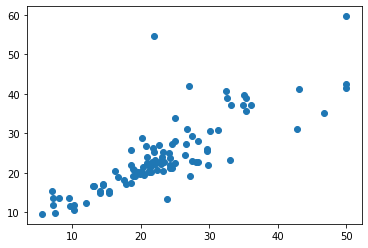

In [30]:
plt.scatter(y_test, model.predict(X_test))
plt.show()

plot differences HIstogream 

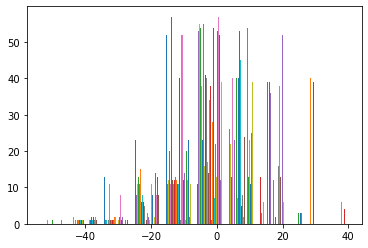

In [33]:
plt.hist(y_test - model.predict(X_test))
plt.show()

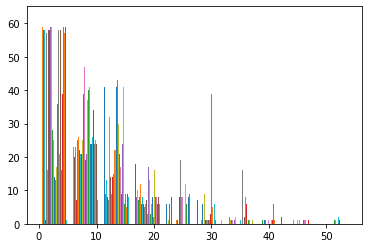

In [32]:
plt.hist(abs(y_test - model.predict(X_test)))
plt.show()